In [1]:
import pandas as pd
df = pd.read_csv("../../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
data_unseen = df.sample(frac=0.1, random_state=42)
df = df.drop(data_unseen.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [4]:
# saving the unseen data as test data
data_unseen.to_csv("../../data/test.csv")

In [5]:
# using a subset of training and validation data to compare models
data_sub = df.sample(frac=0.1, random_state=11)
data_sub.shape

(25633, 31)

In [6]:
from pycaret.classification import *

In [14]:
# setup to compare models
exp_clf = setup(data = data_sub,
                normalize = True,
                transformation = True,
                target = 'Class',
                session_id=123,
                train_size=0.8,
                ignore_features=['Time'],
                fix_imbalance = True,
                polynomial_features = True,
                trigonometry_features = True
                )

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25633, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
models = compare_models(sort="F1", fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9993,0.9722,0.7571,0.8524,0.7999,0.7995,0.8020,0.7120
rf,Random Forest Classifier,0.9992,0.9733,0.6464,0.8695,0.7359,0.7355,0.7464,3.5040
ada,Ada Boost Classifier,0.9987,0.9740,0.7607,0.6413,0.6902,0.6896,0.6949,4.2640
knn,K Neighbors Classifier,0.9978,0.9172,0.8071,0.4591,0.5801,0.5791,0.6048,9.7480
svm,SVM - Linear Kernel,0.9980,0.0000,0.7036,0.5544,0.5762,0.5754,0.6011,0.0800
gbc,Gradient Boosting Classifier,0.9980,0.9711,0.7286,0.4660,0.5654,0.5644,0.5801,20.6960
lightgbm,Light Gradient Boosting Machine,0.9984,0.9727,0.5714,0.5750,0.5579,0.5571,0.5647,0.6440
lr,Logistic Regression,0.9976,0.9637,0.7321,0.4601,0.5427,0.5416,0.5673,3.3580
dt,Decision Tree Classifier,0.9982,0.7406,0.4821,0.5000,0.4896,0.4887,0.4894,0.8560
ridge,Ridge Classifier,0.9880,0.0000,0.8643,0.1229,0.2138,0.2113,0.3211,0.0620


In [7]:
# setup to train only the top 2 models and to track the logs
exp_clf_top2 = setup(data = df,
                normalize = True,
                transformation = True,
                target = 'Class',
                session_id=123,
                train_size=0.8,
                ignore_features=['Time'],
                remove_multicollinearity = True,
                multicollinearity_threshold = 0.95,
                fix_imbalance = True,
                log_experiment = True,
                experiment_name = "Credit Card Fraud - Expt 2",
                log_plots = True
                )

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
top_2 = compare_models(include = ['et','rf'], fold=5, n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9723,0.8041,0.8883,0.8439,0.8436,0.8448,20.3220
rf,Random Forest Classifier,0.9994,0.9627,0.7926,0.8492,0.8194,0.8191,0.8199,64.0260


In [9]:
for model in top_2:
    print(model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=Fals

In [10]:
et = top_2[0]

tuned_et = tune_model(et, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,0.9813,0.8448,0.7424,0.7903,0.7899,0.7916
1,0.9991,0.9825,0.8348,0.6857,0.7529,0.7525,0.7561
2,0.9990,0.9660,0.7931,0.6715,0.7273,0.7268,0.7293
Mean,0.9991,0.9766,0.8242,0.6999,0.7568,0.7564,0.7590
SD,0.0001,0.0075,0.0224,0.0306,0.0259,0.0259,0.0255


In [28]:
rf = top_2[1]

tuned_rf = tune_model(rf, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9974,0.9465,0.8362,0.3760,0.5187,0.5176,0.5597
1,0.9973,0.9457,0.8261,0.3626,0.5040,0.5028,0.5463
2,0.9984,0.9437,0.7931,0.5140,0.6237,0.6230,0.6377
Mean,0.9977,0.9453,0.8185,0.4175,0.5488,0.5478,0.5812
SD,0.0005,0.0011,0.0184,0.0684,0.0533,0.0535,0.0403


In [11]:
print(tuned_et, "\n")

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False) 



In [29]:
print(tuned_rf, "\n")

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False) 



In [12]:
# et model predictions on validation data
et_predict = predict_model(tuned_et)
et_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9991,0.9820,0.8384,0.7281,0.7793,0.7789,0.7808


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.487221,0.051065,-0.239404,0.744598,0.451488,0.578085,0.174157,0.166656,-0.180504,-0.090374,...,-0.000762,-1.062654,0.910280,-0.315624,0.120157,0.019784,-0.322743,0,0,0.6826
1,-1.634638,2.222455,0.831880,-0.561922,-0.291979,-0.186194,0.514068,-0.522143,1.276244,2.768053,...,-0.329191,0.474648,0.610138,0.199605,-3.220937,-0.867092,-1.040869,0,0,0.7259
2,-1.202081,0.136780,-0.074227,2.145637,-0.482338,0.627822,0.304014,0.171772,0.366605,1.390971,...,0.982784,-0.337720,-4.123792,-1.787620,-2.356406,0.498745,1.539270,0,0,0.6809
3,-0.385046,0.787670,-0.544526,0.641019,0.424437,-0.283641,0.424901,0.277523,-0.399837,0.049105,...,-0.032209,1.026558,-1.488267,-0.977137,1.089983,0.809710,-0.666950,0,0,0.7169
4,-0.851019,1.028836,0.022462,-0.168778,0.023487,0.250879,-0.119280,1.066560,-0.792722,-0.417189,...,0.013253,-1.296932,-0.866275,0.387643,-0.095363,0.213891,-1.022205,0,0,0.7213


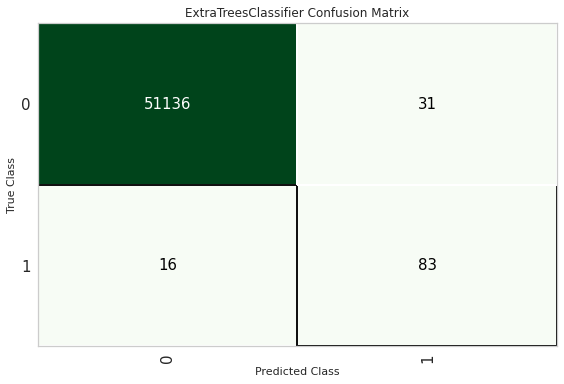

In [13]:
# et confusion matrix
plot_model(tuned_et, plot = 'confusion_matrix')

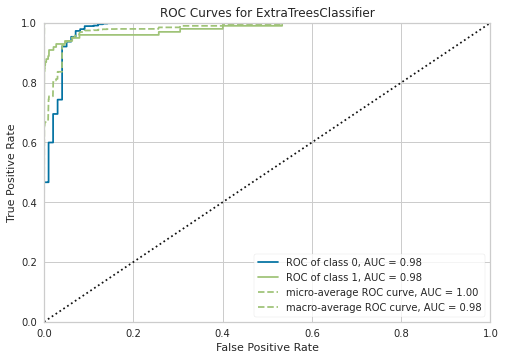

In [14]:
# et AUC
plot_model(tuned_et, plot = 'auc')

In [30]:
# ef model predictions on validation data
rf_predict = predict_model(tuned_rf)
rf_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9982,0.9649,0.8384,0.5188,0.6409,0.6401,0.6587


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.487221,0.051065,-0.239404,0.744598,0.451488,0.578085,0.174157,0.166656,-0.180504,-0.090374,...,-0.000762,-1.062654,0.910280,-0.315624,0.120157,0.019784,-0.322743,0,0,0.8239
1,-1.634638,2.222455,0.831880,-0.561922,-0.291979,-0.186194,0.514068,-0.522143,1.276244,2.768053,...,-0.329191,0.474648,0.610138,0.199605,-3.220937,-0.867092,-1.040869,0,0,0.8239
2,-1.202081,0.136780,-0.074227,2.145637,-0.482338,0.627822,0.304014,0.171772,0.366605,1.390971,...,0.982784,-0.337720,-4.123792,-1.787620,-2.356406,0.498745,1.539270,0,0,0.8239
3,-0.385046,0.787670,-0.544526,0.641019,0.424437,-0.283641,0.424901,0.277523,-0.399837,0.049105,...,-0.032209,1.026558,-1.488267,-0.977137,1.089983,0.809710,-0.666950,0,0,0.8239
4,-0.851019,1.028836,0.022462,-0.168778,0.023487,0.250879,-0.119280,1.066560,-0.792722,-0.417189,...,0.013253,-1.296932,-0.866275,0.387643,-0.095363,0.213891,-1.022205,0,0,0.8239


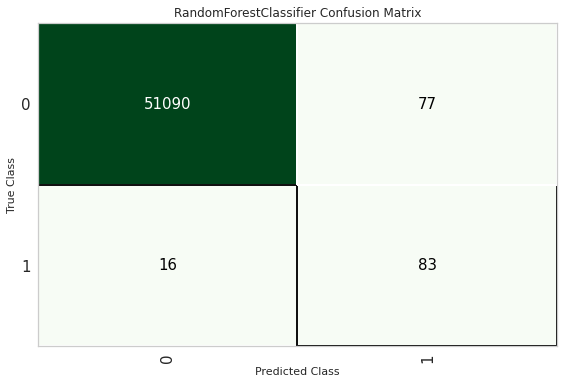

In [31]:
# rf confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

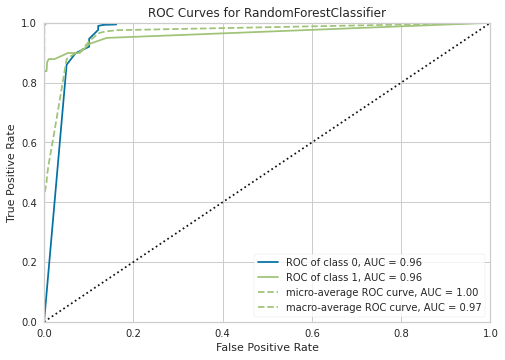

In [32]:
# rf AUC
plot_model(tuned_rf, plot = 'auc')

## Finalizing models

In [15]:
# finalizing tuned_et
final_et = finalize_model(tuned_et)

In [33]:
# finalizing tuned_rf
final_rf = finalize_model(tuned_rf)

## Deploying model on AWS

In [18]:
credentials = pd.read_csv("../../rootkey.csv")
ACCESS_KEY = credentials['value'][0]
SECRET_KEY = credentials['value'][1]
REGION = credentials['value'][2]

In [24]:
import os

os.environ['AWS_ACCESS_KEY_ID'] = ACCESS_KEY
os.environ['AWS_SECRET_ACCESS_KEY'] = SECRET_KEY
os.environ['AWS_DEFAULT_REGION'] = REGION

In [25]:
deploy_model(model = final_et, model_name = "et_deployed", platform = 'aws', authentication = {'bucket' : 'mlopsassignment20d070011'})

Model Successfully Deployed on AWS S3


In [34]:
deploy_model(model = final_rf, model_name = "rf_deployed", platform = 'aws', authentication = {'bucket' : 'mlopsassignment20d070011'})

Model Successfully Deployed on AWS S3


In [37]:
!mlflow ui

[2021-07-27 20:52:36 +0530] [32738] [INFO] Starting gunicorn 20.1.0
[2021-07-27 20:52:36 +0530] [32738] [INFO] Listening at: http://127.0.0.1:5000 (32738)
[2021-07-27 20:52:36 +0530] [32738] [INFO] Using worker: sync
[2021-07-27 20:52:36 +0530] [32740] [INFO] Booting worker with pid: 32740
^C
[2021-07-27 20:53:52 +0530] [32738] [INFO] Handling signal: int
[2021-07-27 20:53:52 +0530] [32740] [INFO] Worker exiting (pid: 32740)
